In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 

In [2]:
# V = [Vr, Vϕ, Bϕ] 
def model(V,r):
    K = -1.0;
    m = 1e4;
    Vt = 0.0;
    a = 0.1;
    # U parameter
    γ = 1/(np.sqrt(1 - (V[0]**2 + V[1]**2)))
    U0 = γ
    Ur = γ*V[0]
    
    ###############
    # ===============================
    Γtt_t = 0  # (1)
    Γtr_t = (m * r * (r**5 + 2 * m * r**4 - 2 * m * a**2 * r**2 ))\
    /(r**4 * (r**4 - 4 * m**2 * r**2 + 4 * a**2 * m**2 )); # (2)
    Γtϕ_t = 0; # (3)
    Γtz_t = 0;  # (4)
    # ================================
    Γrt_t = ((m * r**3) * (r**3 + 2 * r**2 * m - 2 * m * a**2) )\
    /(r**4 * (r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2)); # (5)
    Γrr_t = 0;  # (6)
    Γrϕ_t = -(m * a * r * (3 * r + 4 * m))\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2);   # (7)
    Γrz_t = 0 ; # (8)
    # =================================
    Γϕt_t = 0; # (9)
    Γϕr_t = -(m * a * r * (3 * r + 4 * m))\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 + m**2 );  # (10)
    Γϕϕ_t = 0;  # (11)
    Γϕz_t = 0;  # (12)
    # ==================================
    Γzt_t = 0;  # (13)
    Γzr_t = 0;  # (14)
    Γzϕ_t = 0;  # (15)
    Γzz_t = 0;  # (16)
    # ==================================
    Γtt_r = (m)/(r * (r**2 + 2*m));  # (17)
    Γtr_r = 0;  # (18)
    Γtϕ_r = - (m * a)/(r * (r + 2 * m));  # (19)
    Γtz_r = 0;  # (20)
    # =================================
    Γrt_r = 0;  # (21)
    Γrr_r = - (m)/(r * (r + 2 * m));  # (22)
    Γrϕ_r = 0;   # (23)
    Γrz_r = 0;  # (24)
    # =================================
    Γϕt_r = -(m * a)/(r * (r + 2 * m));  # (25)
    Γϕr_r = 0;  # (26)
    Γϕϕ_r = -(r * (r + m))/(r + 2 * m); # (27)
    Γϕz_r = 0; # (28)
    # ================================
    Γzt_r = 0; # (29)
    Γzr_r = 0; # (30)
    Γzϕ_r = 0; # (31)
    Γzz_r = (m)/(r * (r + 2 * m)); # (32)
    # =================================
    Γtt_ϕ = 0; # (33)
    Γtr_ϕ = (a * m)/(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (34)
    Γtϕ_ϕ = 0; # (35)
    Γtz_ϕ = 0; # (36)
    # ==================================
    Γrt_ϕ = (a * m)/(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (37)
    Γrr_ϕ = 0; # (38)
    Γrϕ_ϕ = -(r**3 * m - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2)\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (39)
    Γrz_ϕ = 0; # (40)
    # ==================================
    Γϕt_ϕ = 0;  # (41)
    Γϕr_ϕ = -(r**3 * m - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2)\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2);  # (42)
    Γϕϕ_ϕ = 0;  # (43)
    Γϕz_ϕ = 0;  # (44)
    # ==================================
    Γzt_ϕ = 0;  # (45)
    Γzr_ϕ = 0;  # (46)
    Γzϕ_ϕ = 0;  # (47)
    Γzz_ϕ = 0;  # (48)
    # ================================
    Γtt_z = 0;  # (49)
    Γtr_z = 0;  # (50)
    Γtϕ_z = 0;  # (51)
    Γtz_z = 0;  # (52)
    # ====================================
    Γrt_z = 0;  # (53)
    Γrr_z = 0;  # (54)
    Γrϕ_z = 0;  # (55)
    Γrz_z = -(m)/(r * (r + 2 * m));  # (56)
    # =================================
    Γϕt_z = 0;  # (57)
    Γϕr_z = 0;  # (58)
    Γϕϕ_z = 0;  # (59)
    Γϕz_z = 0;  # (60)
    # ====================================
    Γzt_z = 0;  # (61)
    Γzr_z = -(m)/(r * (r + 2 * m));  # (61)
    Γzϕ_z = 0;  # (61)
    Γzz_z = 0;  # (61)
    # ======================================
    # Vϕ Computation
    dVϕ_dr = (-1.0/V[0])*((2*V[0]*(Γtr_ϕ - Γtr_t*V[1]))+\
#                           V[0]*V[2]*(Γrt_ϕ - Γrt_t*V[1]) +\
                          V[0]*V[1]*(Γϕr_ϕ - Γϕr_t*V[1])+\
                          V[0]*V[1]*(Γrϕ_ϕ - Γrϕ_t*V[1]))

        # Bϕ
#     L1 = Γtt_r - 2 * Γtr_t * V[0]*V[0] + 2 * V[1] * Γtϕ_r + \
#     Vt*V[0]*(Γrt_t - Γrt_t * V[0]) + \
#     (V[0] * V[0] * Γrr_r) - (Γϕr_t * V[0] * V[0] * V[1]) - \
#     (Γrϕ_t * V[0] * V[0] * V[1]) + (Γϕϕ_r * V[1] * V[1])
    
#     L2 = V[0] * (Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t) + \
#     V[0] * (Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t) - \
#     V[0] * V[1] * (Γrϕ_t - Γϕr_t) 
    
#     dBϕ_dr = ( 1/(V[2]*(1+2*Ur*U0))) * ((r**1.5 + K*r**2.5) * U0**2 * (L1) - \
#                     ((r**1.5 + K*r**2.5)**2) * U0**2 * (0.25/r) * (L2)* V[0] + \
#                     (2.5 * r**1.5) * (1 + 2*m/r))  - \
#                     V[2] * (1/r + 1/r**2)
# new Bϕ 02-03-20

    dBϕ_dr = (((V[2]/4*np.pi)*(1-(r**1.5+K*r**2.5)*(2*V[0]*Ur*U0))*\
               ((r**2)/(r**2 + 2*m*r + 4*m**2)))**-1)*\
    ((V[2]/(4*np.pi))*(1-(r**1.5+K*r**2.5)*(2*V[0]*Ur*U0))*\
    (V[2]*((2*m*r**2 + 8*r*m**2)/(r**2+2*m*r+4*m**2)**2) +\
     V[2]*\
     (((m*r**6 + 2*m**2*r**5 - 2*a**2*r**3*m**2)/\
       (r**8 - 4*r**6*m**2 + 4*r**4*a**2*m**2)) -\
      (m/(r**2 + 2*m*r)) - (m/(r**2 + 2*m*r))*\
      ((m*r**3 - r**4 + 2*r**2*m**2 + 2*a**2*m**2)/(r**4 - 4*r**2*m**2 + 4*a**2*m**2)))*\
     ((r**2)/(r**2+2*m*r+4*m**2)))-\
    (r**1.5*+K*r**2.5)*U0**2*\
     (((r**1.5 + K*r**2.5)**-1)*(-V[0]*(1.5*r**0.5 - 2.5*K*r**1.5))-\
      (r**1.5+K*r**2.5)*\
      ((V[0]*(Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t))+\
       (V[0]*(Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t))-\
       (Γrϕ_t*V[1]*V[0] + Γϕr_t*V[0]*V[1])))*V[0] - (1 + 2*m/r)*(2.5*K*r**1.5) -\
     (r**1.5 + K*r**2.5)*U0**2*(Γtt_r - 2*Γtr_t*V[0]*V[0] + 2*V[1]*Γtϕ_r +\
                                Vt*V[0]*(Γrt_t - Γrt_t*V[0]))+\
     V[0]*V[0]*Γrr_r - Γϕr_t*V[0]*V[0]*V[1] - Γrϕ_t * V[1]*V[0]**2 + V[1]*V[1]*Γϕϕ_r
    ) 
    
    
    #  # Vr Computation
#     dVr_dr = -V[0]*((1.5*r**0.5 - 2.5*K*r**1.5) /(r**1.5+K*r**2.5)) + \
#                    ((-2.0/(U0)**2) * (1.0/(r**1.5+K*r**2.5))) +\
#                     -V[0]*(Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t) -\
#                     V[0]*(Γrz_r + Γϕz_ϕ + Γzz_z -Γzt_t) +\
#                     -Γrϕ_t*V[1]*V[0] + Γϕr_t*V[0]*V[1]


#     Jz = -V[2] * (1/r + 1/r**2) - dBϕ_dr


#     Jz = -(V[2])/(r) - dBϕ_dr - V[2]*(1/r**2 -\
#         (m/(r*(r + 2 * m)))*(1 + (m*r**3 - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2 )\
#                              /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2)))

    Jz = (-1.0/(4*np.pi))*(((2*r*(r**2+2*m*r+4*m**2)-(2*r+2*m+4*m**2)*r**2)/\
                          ((r**2+2*m*r+4*m**2)**2))*V[2] +\
                         (r**2/(r**2+2*m*r+4*m**2))*dBϕ_dr +\
                         (((m*r*(r**5+2*m*r**4-2*m*r**2*a**2))/\
                           (r**2*(r**6-4*m**2*r**4+4*r**2*a**2*m**2)))-\
                          (m/(r**2+2*m*r))-(m/(r**2+2*m*r))*\
                          ((m*r**3-r**4+2*r**2*m**2+\
                            2*a**2*m**2)/(r**4-4*r**2*m**2+4*a**2*m**2)))*\
                            (r**2/(r**2+2*m*r+4*m**2))*V[2])


    dVr_dr = -(V[0]*(Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t +\
                    Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t) -\
               V[0]*V[1]*(Γrϕ_t + Γϕr_t)) -\
    V[0]*((1.5 * r**0.5 - 2.5 * K * r**1.5)/(r**1.5 + K * r**2.5))-\
    (2 * Ur * U0 * V[2] * Jz)/(U0**2)


    
    dVdr = [dVr_dr, dVϕ_dr, dBϕ_dr]              
    return dVdr

In [7]:
r = np.linspace(3.5,10)   # [2.5,7.3] 
Vr0 = 0.18;
Vϕ0 = 0.918;  # 0.918
Bϕ0 = 4e4;
V = odeint(model,[Vr0,Vϕ0,Bϕ0],r)

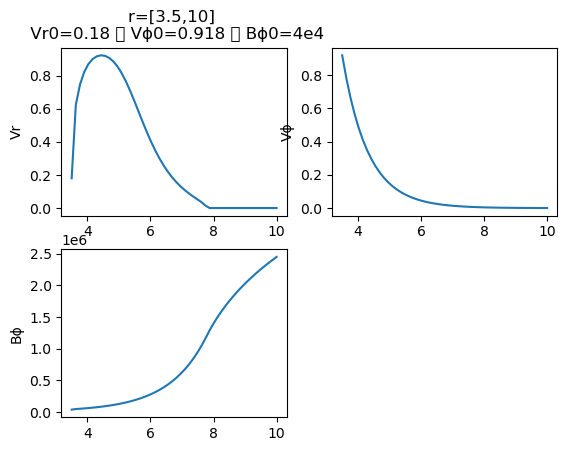

In [8]:
# plt.figure(figsize=(6,6), dpi=900)
plt.subplot(221)
plt.title("r=[3.5,10] \n Vr0=0.18 \t Vϕ0=0.918 \t Bϕ0=4e4", loc="center")
# plt.xlabel('r')
plt.ylabel('Vr')
plt.plot(r,V[:,0])
plt.subplot(222)
plt.ylabel('Vϕ')
plt.plot(r,V[:,1])
plt.subplot(223)
plt.ylabel('Bϕ')
plt.plot(r,V[:,2])
# plt.savefig("all_in_one")
plt.show()

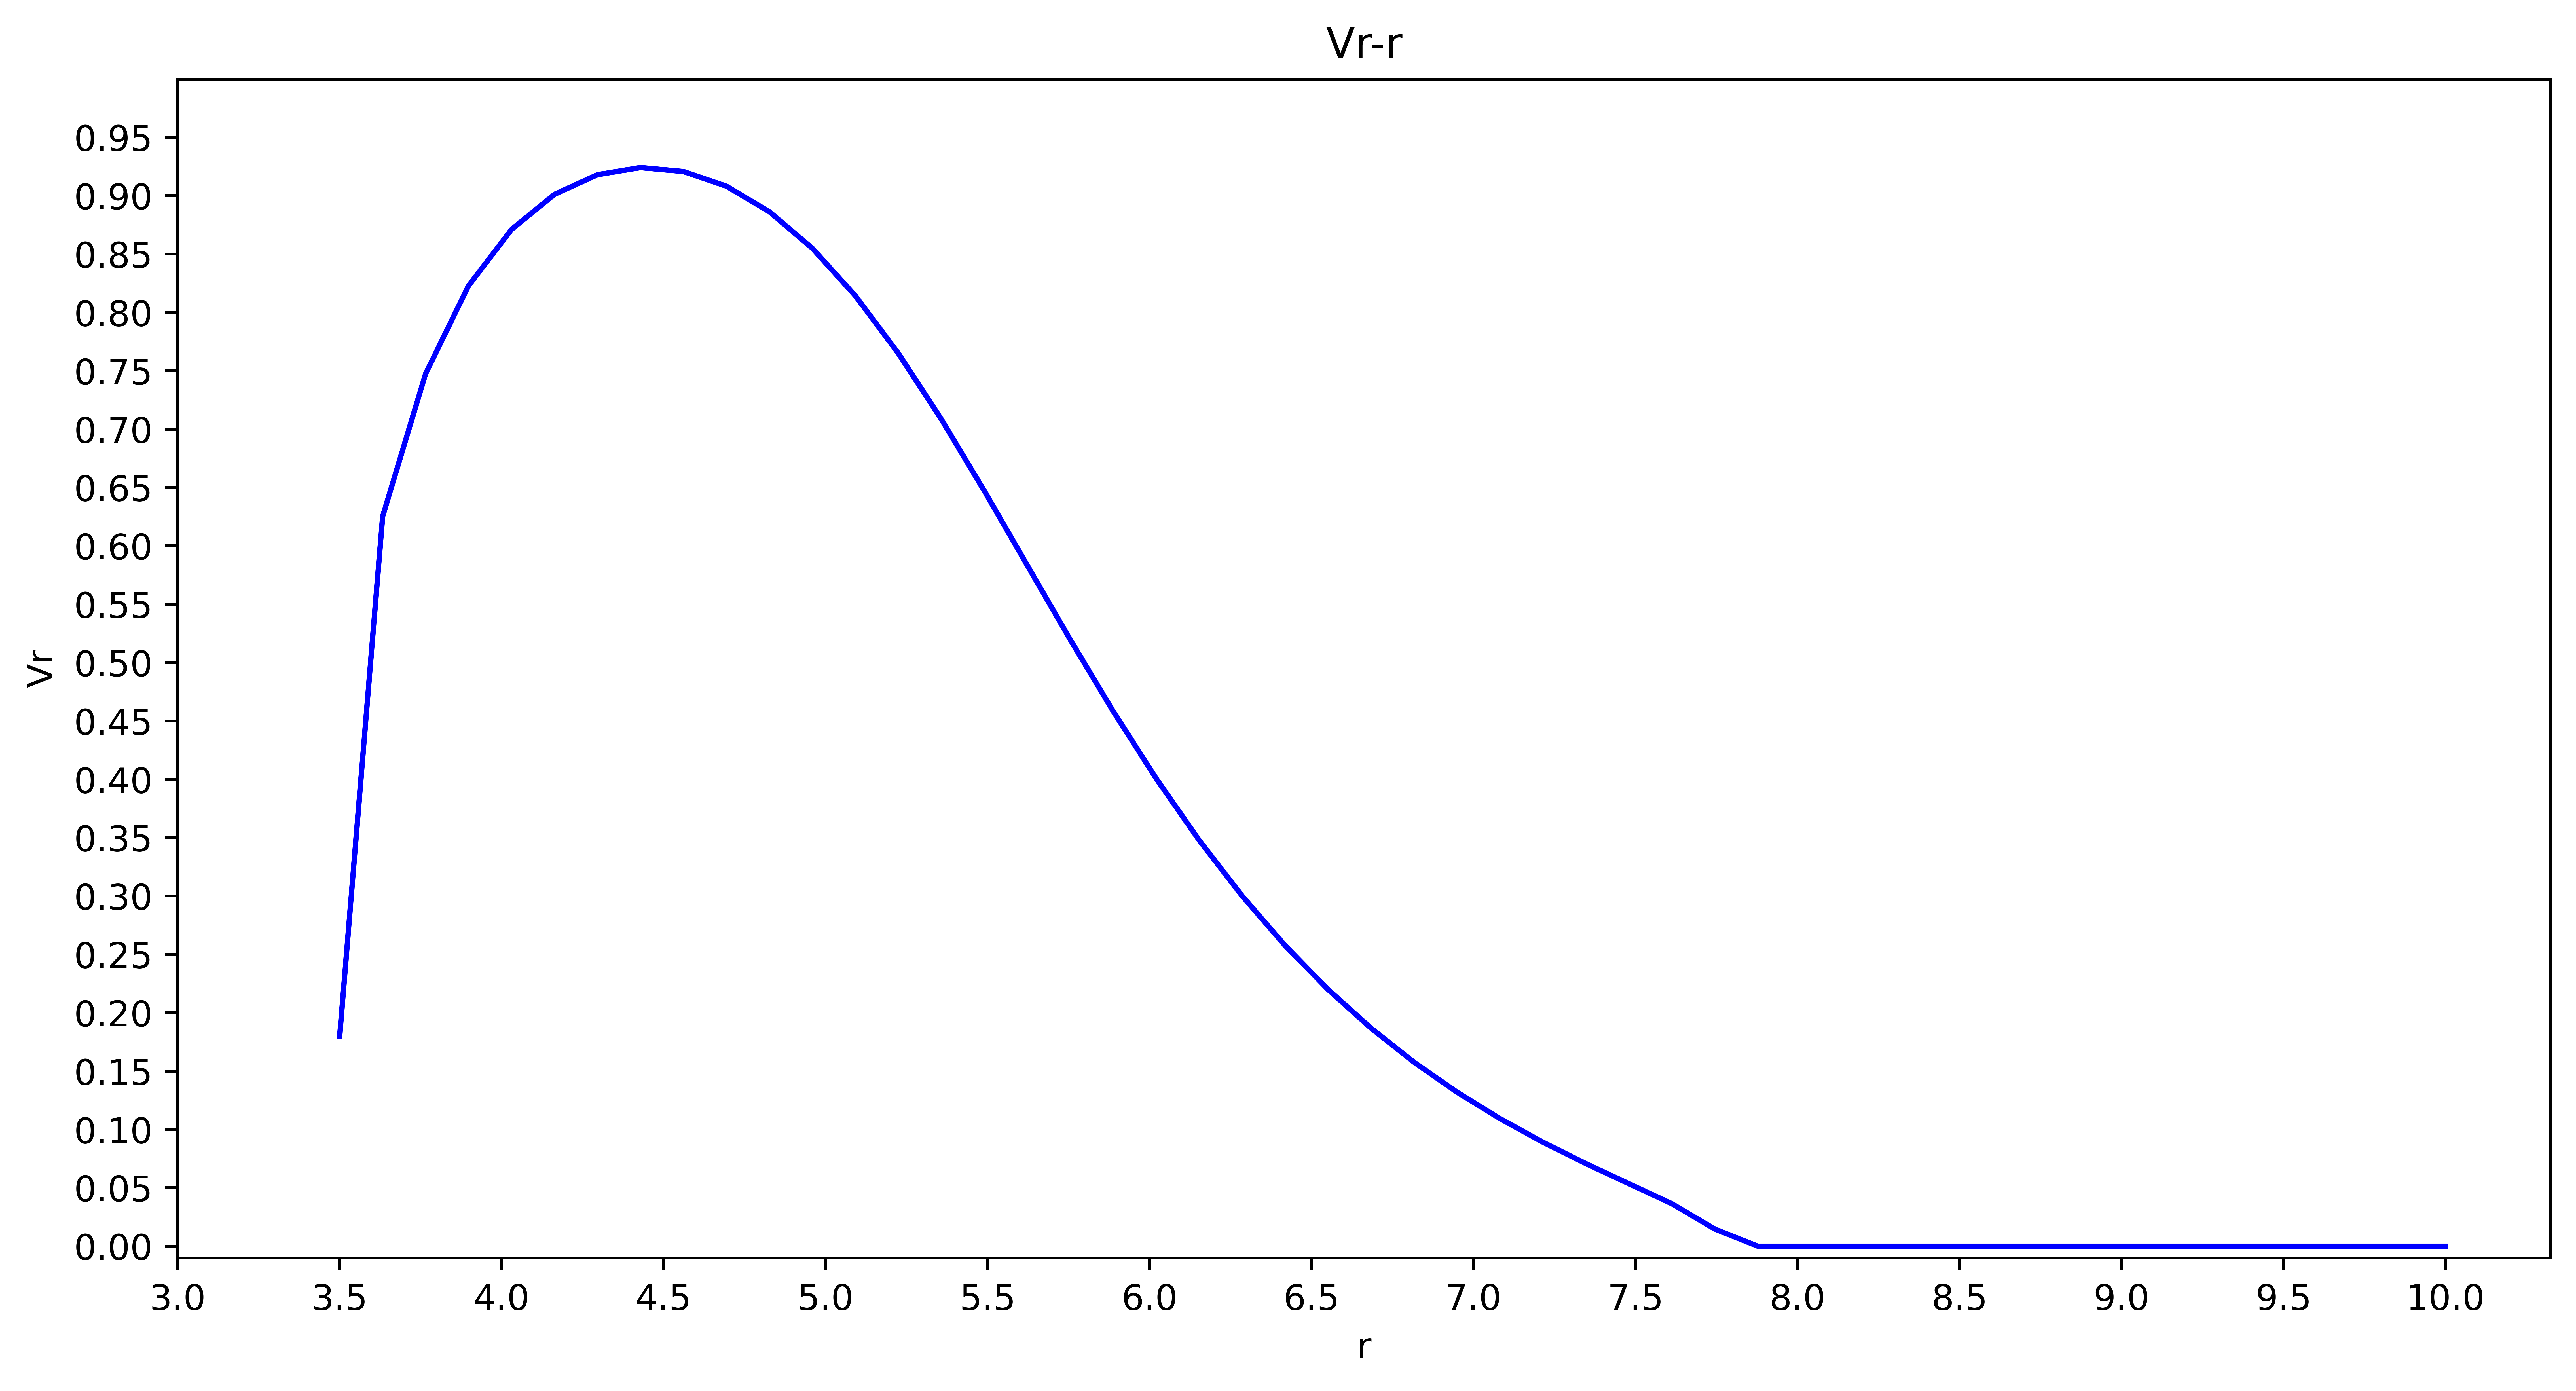

In [80]:
plt.figure(figsize=(12,6), dpi=900)
plt.plot(r,V[:,0],c='b')
plt.title("Vr-r")
plt.xlabel("r")
plt.ylabel("Vr")
plt.ylim(-0.01,1.0)

# plt.xticks(np.arange(1,20,2))
plt.yticks(np.arange(0,1.0,0.05))
plt.xticks(np.arange(3,10.5,0.5))

plt.savefig("Vr")
plt.show()

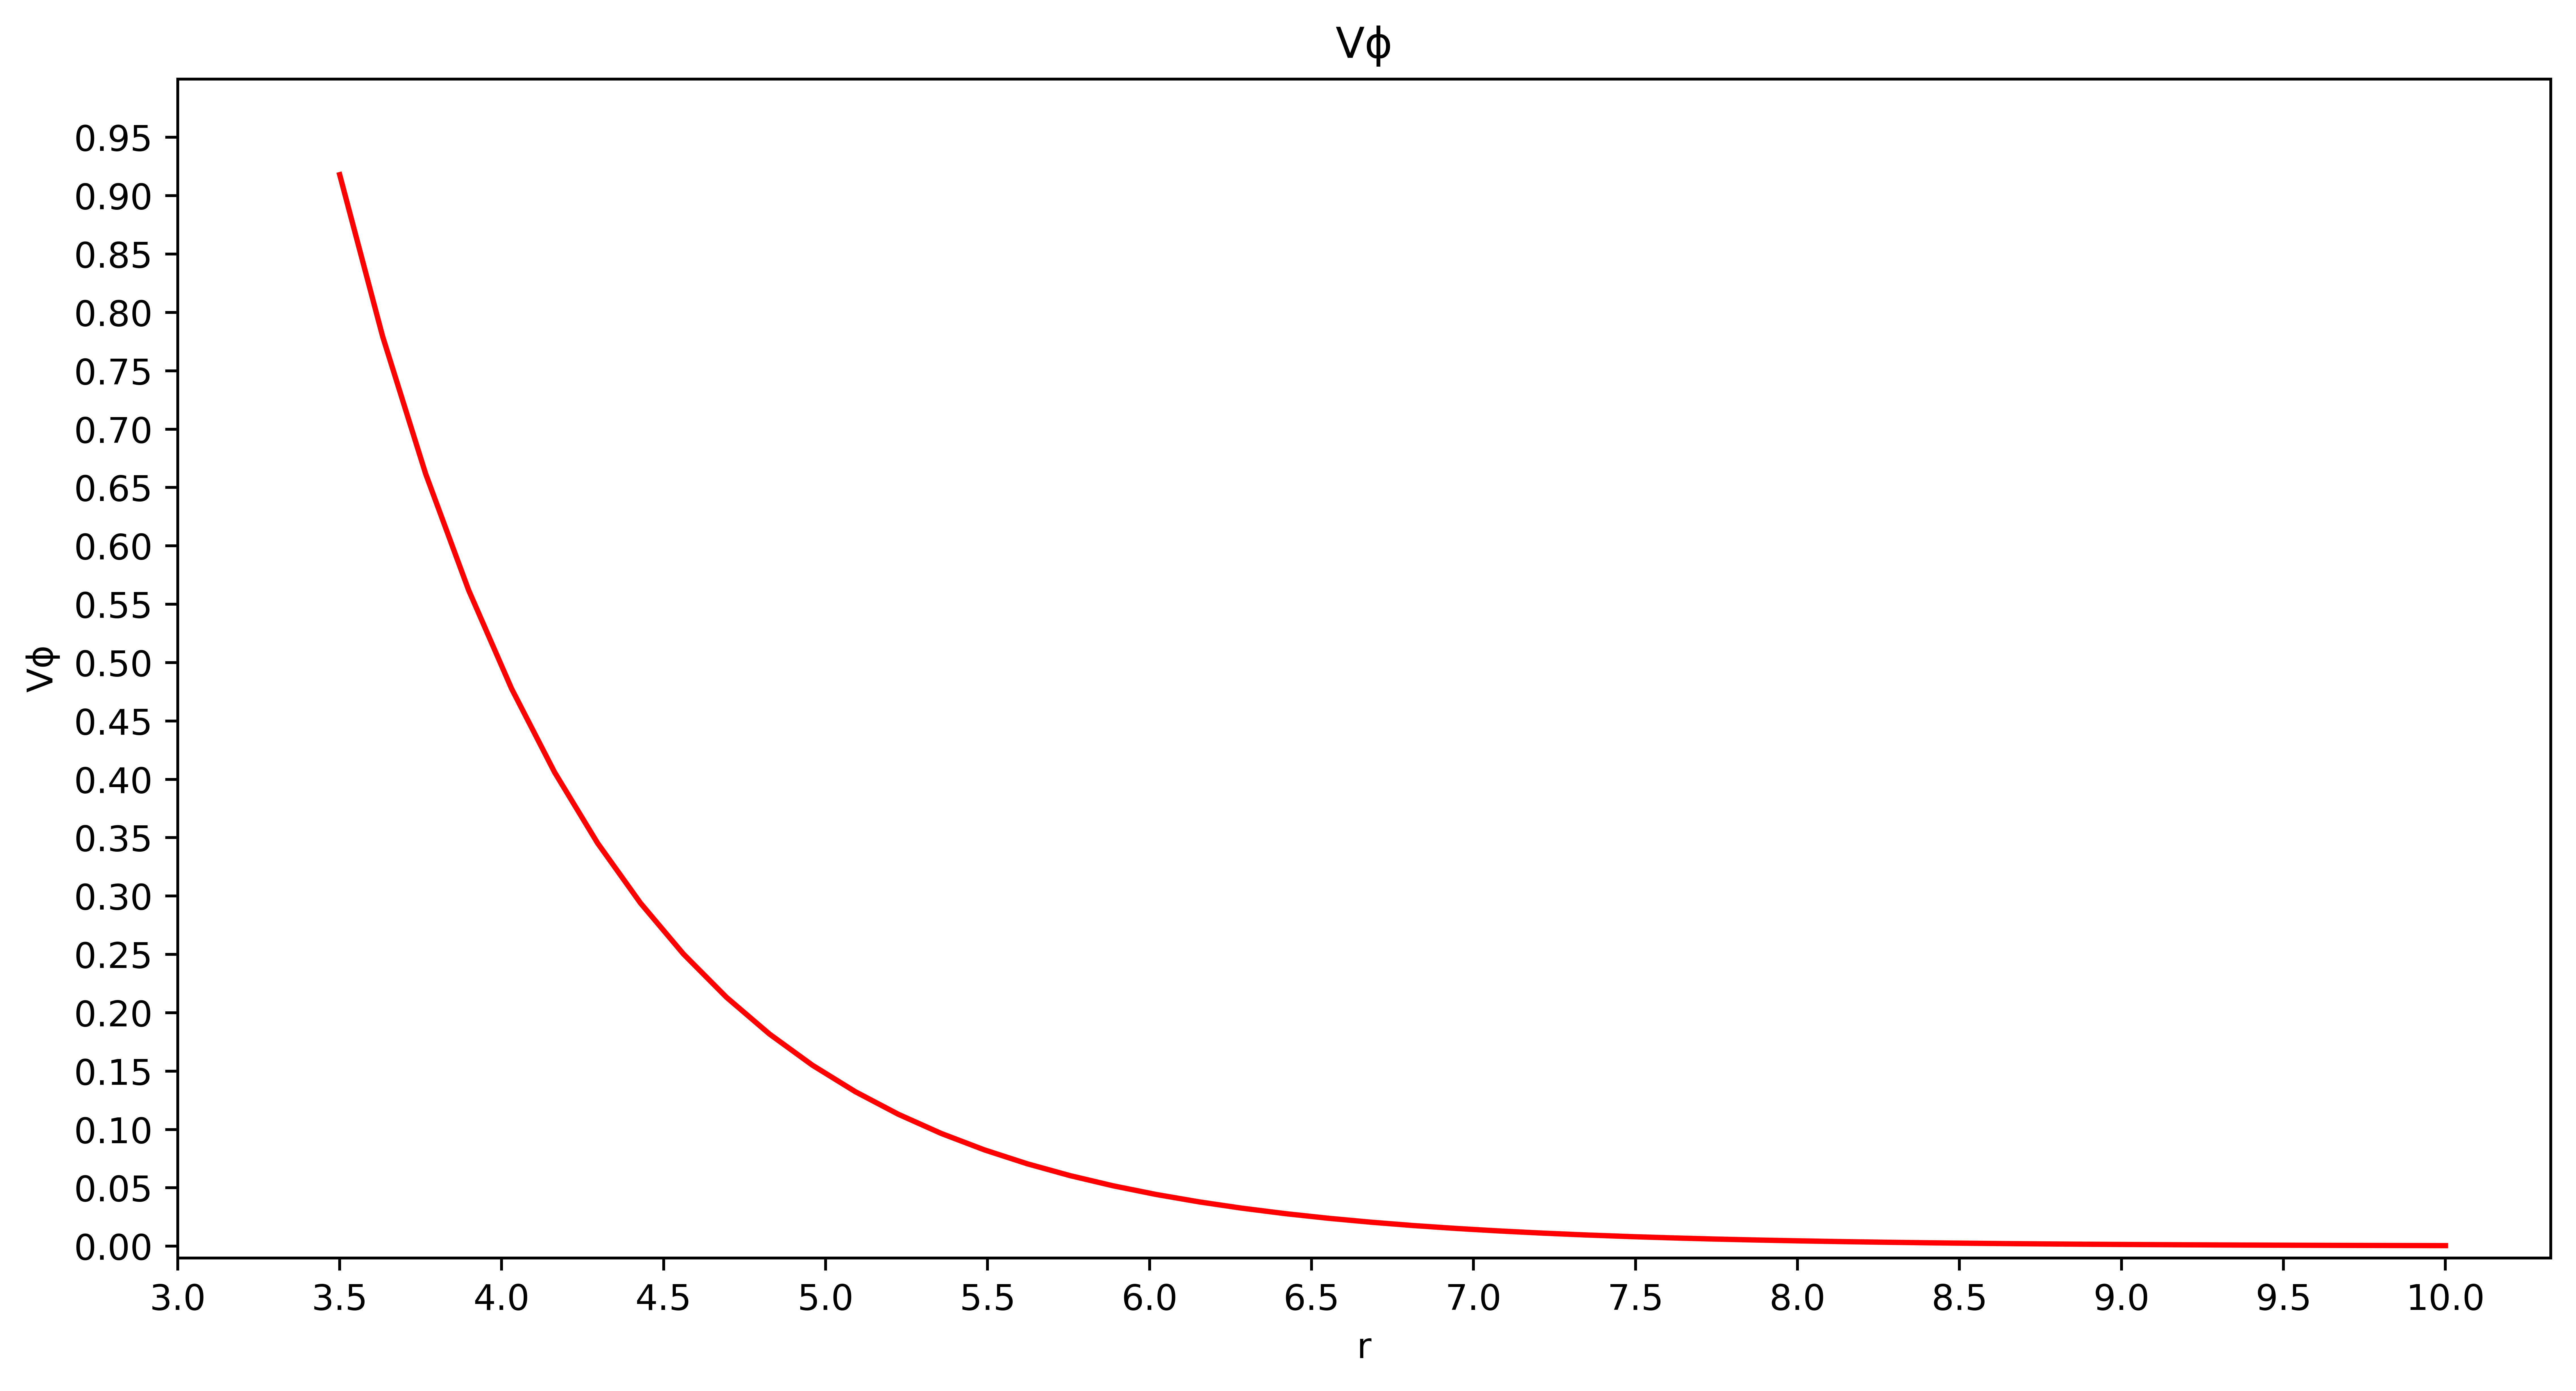

In [84]:
plt.figure(figsize=(12,6), dpi=900)
plt.plot(r, V[:,1],c='r')
plt.title("Vϕ")
plt.xlabel("r")
plt.ylim(-0.01, 1.0)
plt.ylabel("Vϕ")
plt.xticks(np.arange(3,10.5,0.5))
plt.yticks(np.arange(0,1,0.05))

plt.savefig("Vϕ")
plt.show()

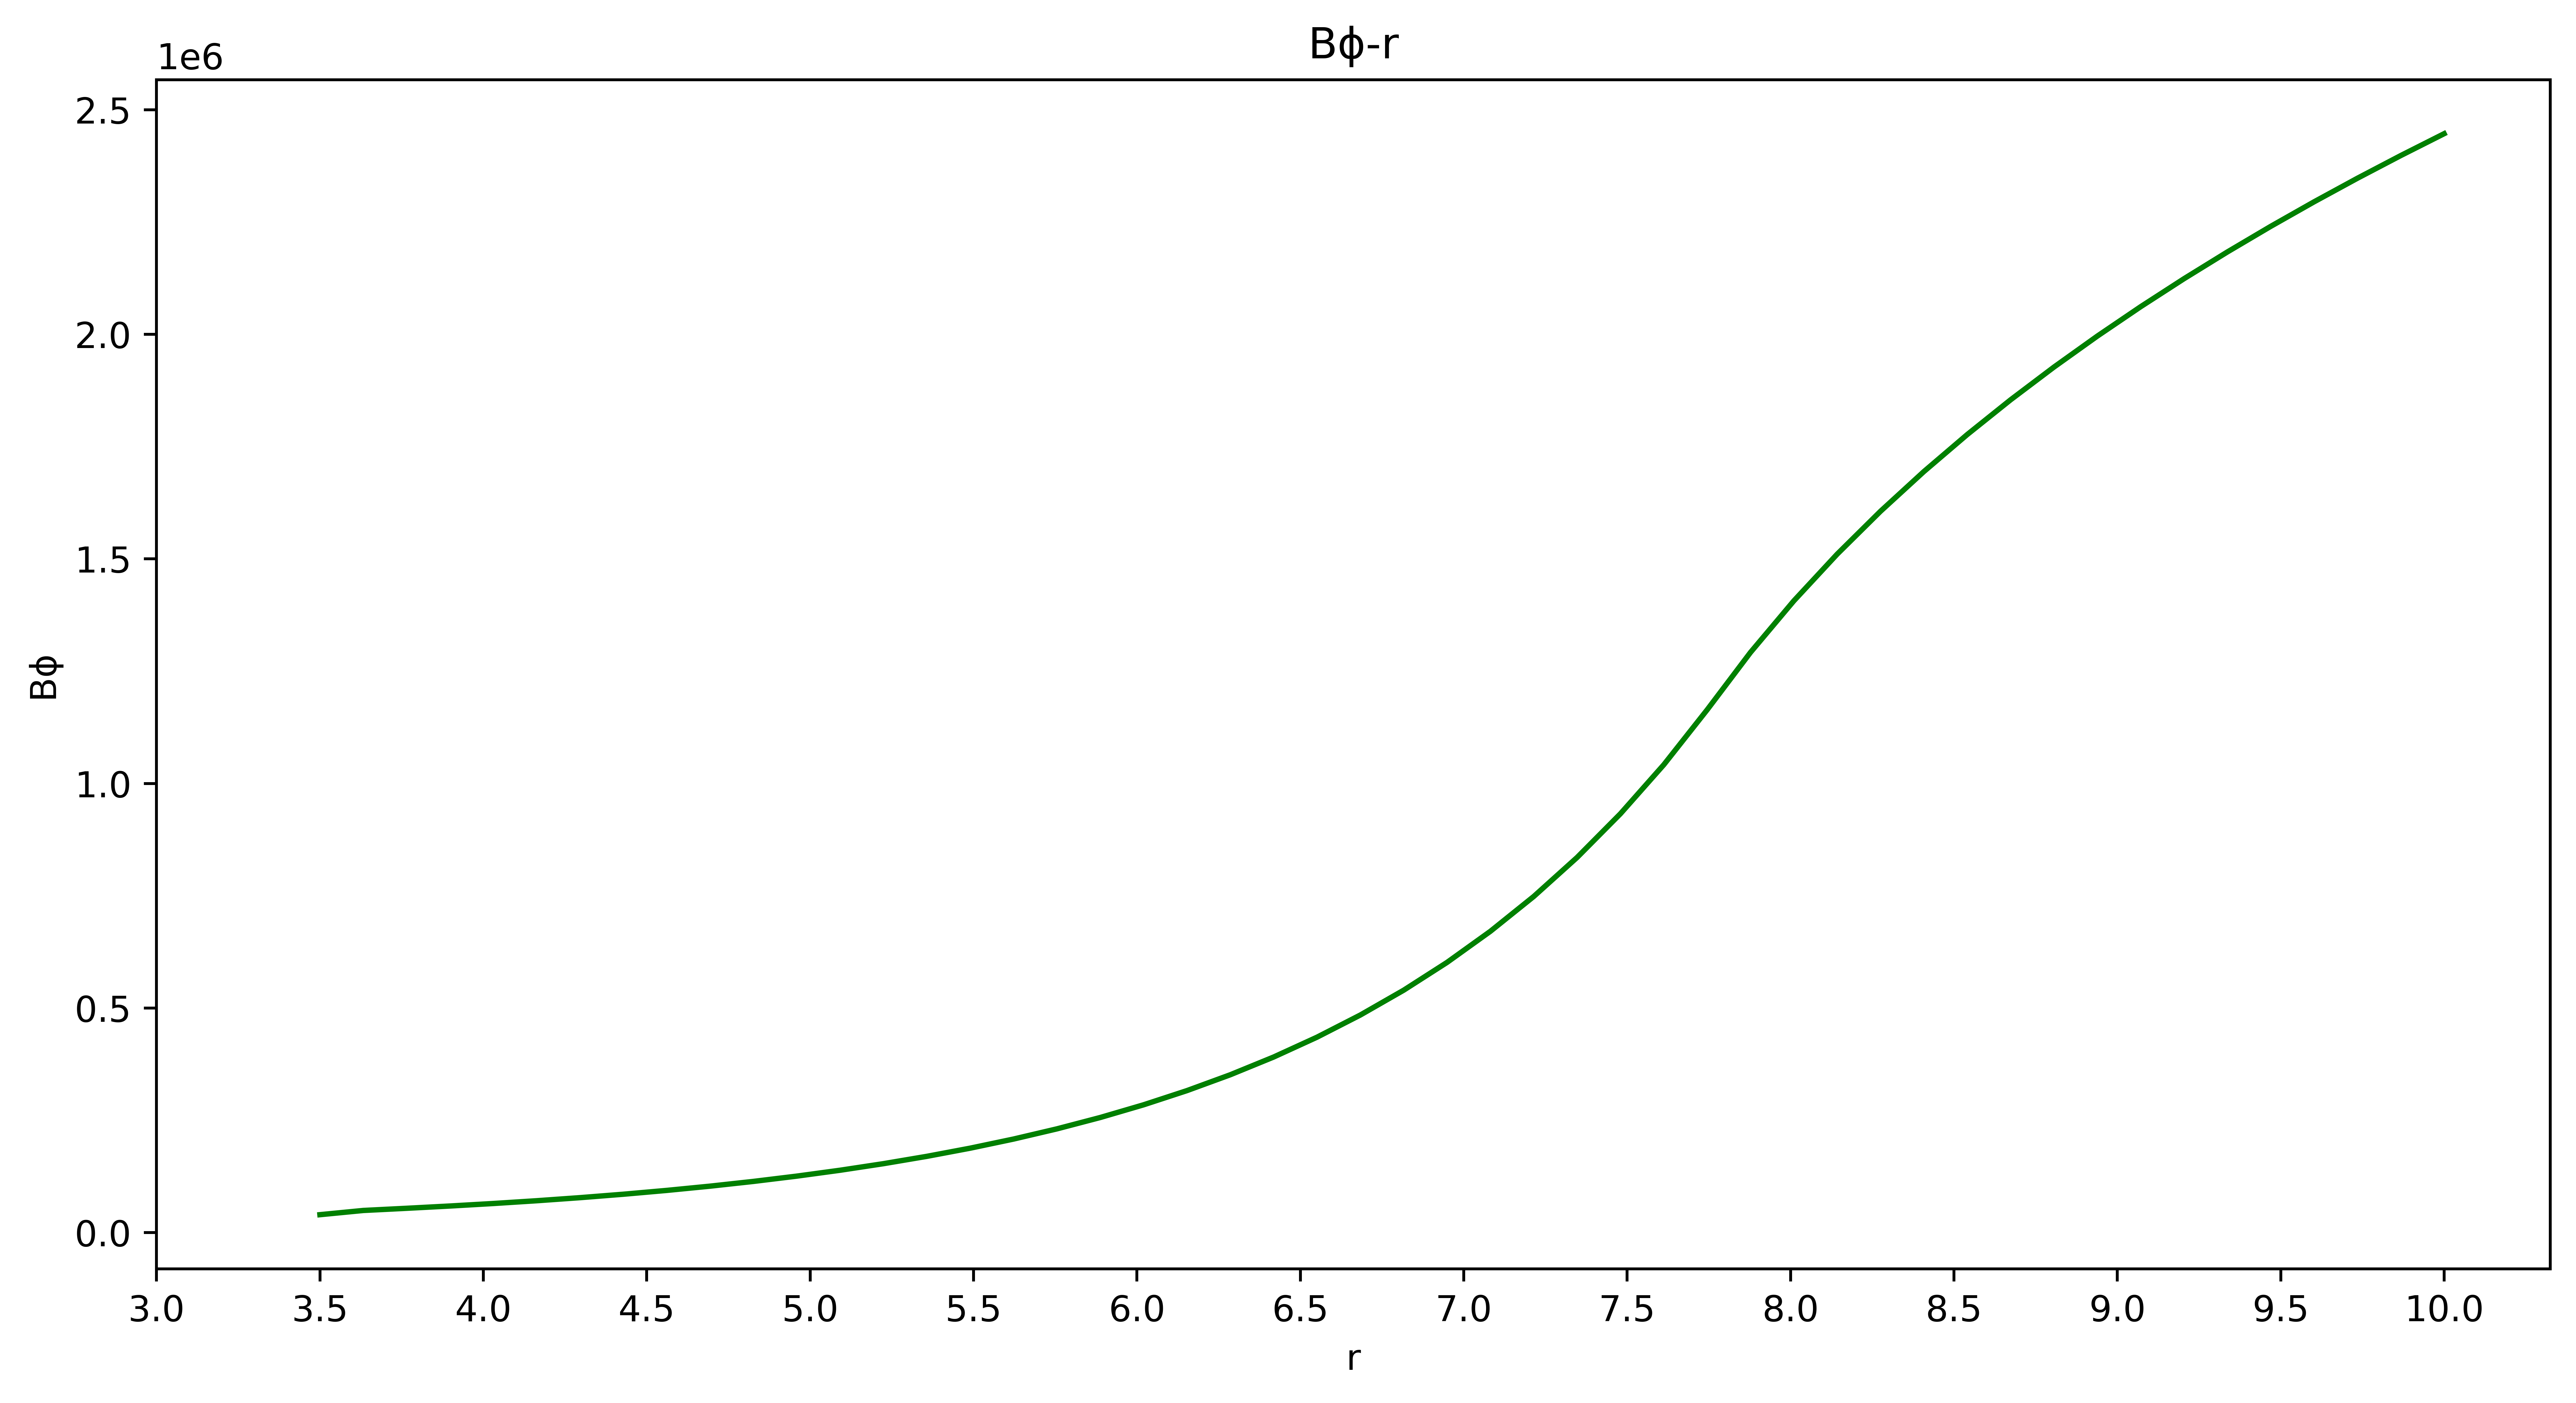

In [87]:
plt.figure(figsize=(12,6), dpi=900)
plt.plot(r,V[:,2],c='g')
plt.xlabel("r")
plt.ylabel("Bϕ")
plt.title("Bϕ-r")
# plt.ylim(-1e3,11e3)
plt.xticks(np.arange(3,10.5,0.5))
# plt.yticks(np.arange(0,5e4,5e3))

plt.savefig("Bϕ")
plt.show()

Text(0.5, 1.0, 'Vr-vs-Vϕ  (r)')

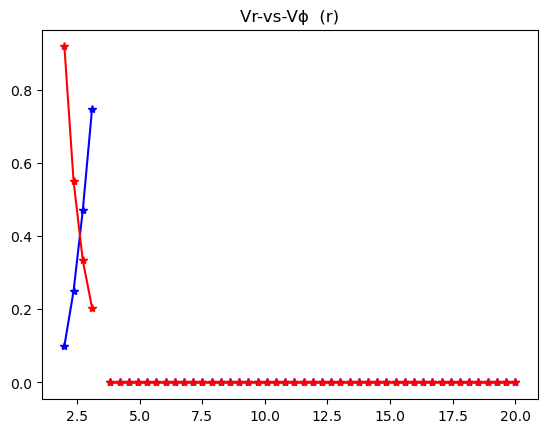

In [127]:
# plt.figure(figsize=(12,6), dpi=1200)
plt.plot(r,V[:,0],'-b*',label="Vr")
plt.plot(r, V[:,1],'-r*', label="Vϕ")
plt.title("Vr-vs-Vϕ  (r)")
# plt.xlabel("r")
# plt.legend(["Vr","Vϕ"], loc="upper right")
# plt.ylim(-0.01, 1.0)
# plt.xticks(np.arange(1,5,1))
# plt.yticks(np.arange(0,1.1,0.1))
# plt.show()
# plt.savefig("Vr_Vϕ")

In [14]:
γ = 1/np.sqrt(1 - (V[:,0]**2 + V[:,1]**2))

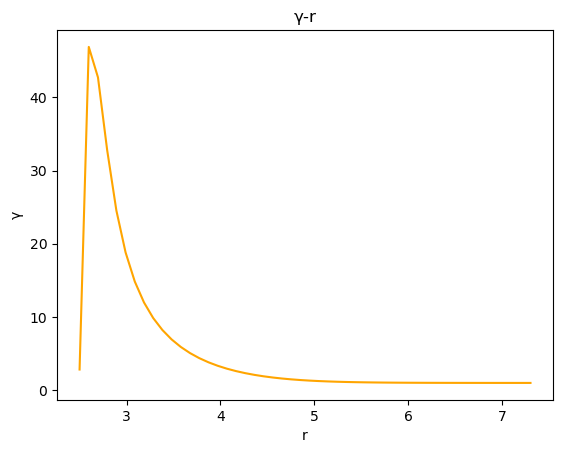

In [15]:
# plt.figure(figsize=(12,6), dpi=900)
plt.plot(r,γ,c='orange')
plt.xlabel("r")
plt.ylabel("γ")
plt.title("γ-r")
# plt.ylim(0.9,2.80)
# plt.xticks(np.arange(1,5,1))
# plt.yticks(np.arange(1,3,0.25))
plt.show()
# plt.savefig("γ")

In [41]:
def Euler(f,init_val, r):
    Vr = np.zeros(len(r))
    Vϕ = np.zeros(len(r))
    Bϕ = np.zeros(len(r))
    
    for j in range(0,len(r)-1):
        h = (r[j+1] - r[j])*(1e-1)
        V = f(init_val,r)
        Vl = np.array(V)
        Vlt = np.transpose(Vl)
#         print(type(V))
        Vr[j+1] = Vr[j] + h*Vlt[0][j]
        Vϕ[j+1] = Vϕ[j] + h*Vlt[1][j]
        Bϕ[j+1] = Bϕ[j] + h*Vlt[2][j]
    return [Vr,Vϕ,Bϕ]

In [42]:
V0 = [0.18,0.919, 2.5e4]
r = np.linspace(2.5,10.0) 
V = Euler(model,V0,r)
V = np.array(V)
Vt = np.transpose(V)
Vt.shape

IndexError: index 3 is out of bounds for axis 0 with size 3

In [34]:
type(V)

numpy.ndarray

print(np.column_stack((r,Vt[:,0])));

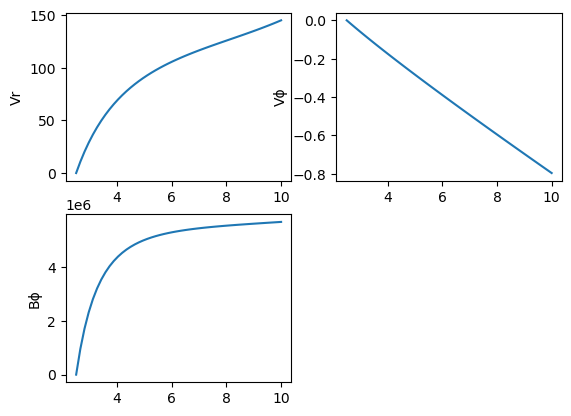

In [33]:
plt.subplot(221)
# plt.xlabel('r')
plt.ylabel('Vr')
plt.plot(r,Vt[:,0])
plt.subplot(222)
plt.ylabel('Vϕ')
plt.plot(r,Vt[:,1])
plt.subplot(223)
plt.ylabel('Bϕ')
plt.plot(r,Vt[:,2])
plt.show()